In [6]:
import numpy as np
import pandas as pd

In [7]:
print(pd.__version__)

1.5.0


In [8]:
#mengunduh modul yang dibutuhkan pandas untuk membaca file excel
pip install xlrd

SyntaxError: invalid syntax (3418862705.py, line 2)

In [9]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                                sheet_name='Canada by Citizenship',
                                skiprows=range(20),
                                skipfooter=2)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [10]:
#melihat 5 baris tearatas
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
#melihat 5 baris terbawah
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [12]:
#menghapus beberapa kolom yang tidak diperlukan
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [13]:
#merubah nama kolom
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent',
'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [14]:
#menambahkan kolom total untuk menjumlahkan imigran selama 1980-2013
df_can['Total'] = df_can.sum(axis=1)

C:\Users\USER\AppData\Local\Temp\ipykernel_10068\1637490730.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [15]:
#melihat seberapa banyak null dalam database
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [16]:
#menjaidkan country sebagai indeks
df_can.set_index('Country', inplace=True)

In [17]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [18]:
#melihat jumlah imigran dari negara jepang
print(df_can.loc['Japan'])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [19]:
#melihat jumlah imigran jepang pada tahun 2001
print(df_can.loc['Japan',2001])

1092


In [20]:
#melihat jumlah imigran jepang dari tahun 1980 sampai 1985
print(df_can.loc['Japan',[1980, 1981, 1983, 1984, 1985]])

1980    701
1981    756
1983    309
1984    246
1985    198
Name: Japan, dtype: object


In [21]:
#mengubah nama kolom menjadi string 
df_can.columns = list(map(str, df_can.columns))


In [22]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [23]:
#ketika kita ingin memfilter dataframe menurut suatu kondisi,
#kita dapat menerukannya dengan vektor boolean
#1. membuat kondisi boolean untuk memfilter area Asia
condition = df_can['Continent'] == 'Asia'
print (condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [24]:
#2. meneruskannya
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [25]:
#melihat perubahan-perubahan yang sudah dibuat pada dataframe
print ('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


visualiasi data dengan matplotlib

In [26]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.6.0


In [28]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [29]:
#mengekstrak series data untuk Haiti
haiti = df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot: >

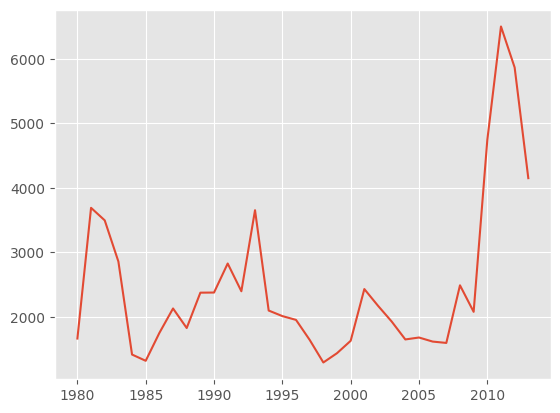

In [30]:
#membuat plot garis
haiti.plot()

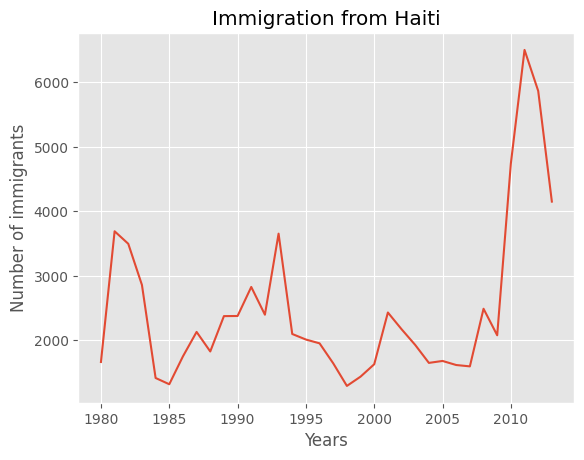

In [31]:
#memberikan label nama pada sumbu x dan y 
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

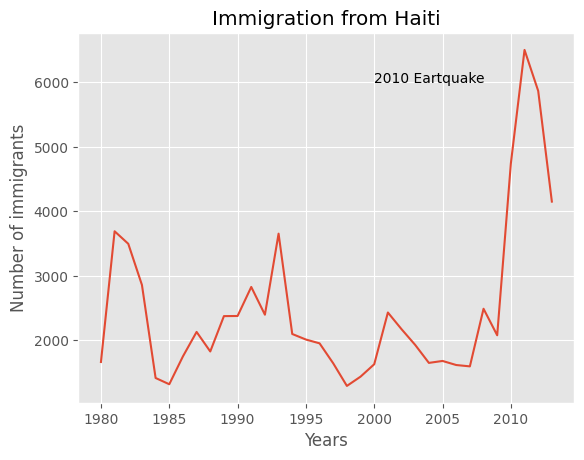

In [32]:
#memberikan anotasi atau catatan lonjakan pada plot
#yaitu dengan plt.text(x, y, label)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2000, 6000, '2010 Eartquake')

plt.show()

In [33]:
#menambahkan lebih banyak negara ke dlaam plot garis untuk membuat perbandingan
#1. mengumpula data untuk china dan india kemudian ditampilkan dataframe
China_India = df_can.loc[['China', 'India'], years]
China_India

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<AxesSubplot: xlabel='Country'>

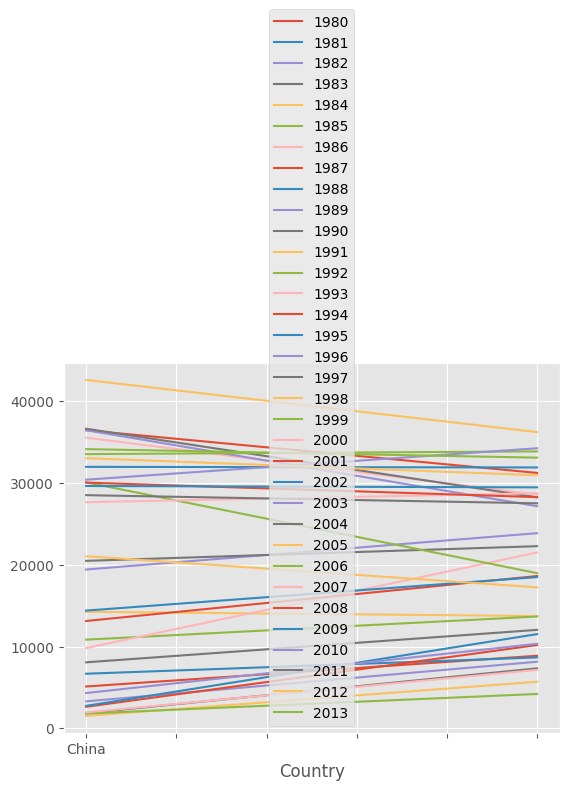

In [34]:
#membuar plot grafiknya dengan meneruskan parameter kind ke plot()
China_India.plot(kind='line')

In [37]:
#terlihat data di atas seperti tertukar, karna yang diinginkan
#memplot indeks pada sumbu x dan kolom sebagai garis indi pada sumbu y maka kita harus
#menukar baris dan kolom dengan transpose()
df_CI = China_India.transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


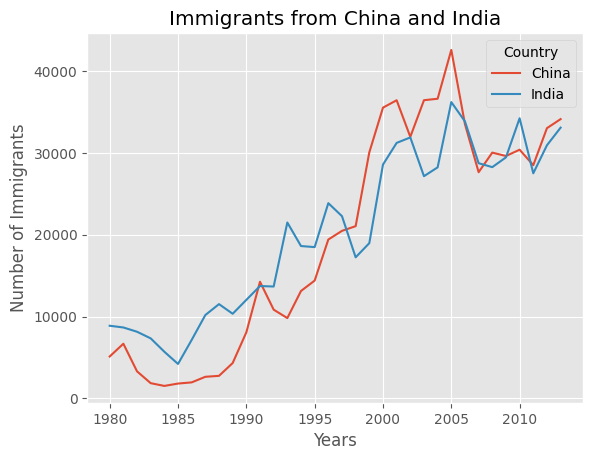

In [38]:
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

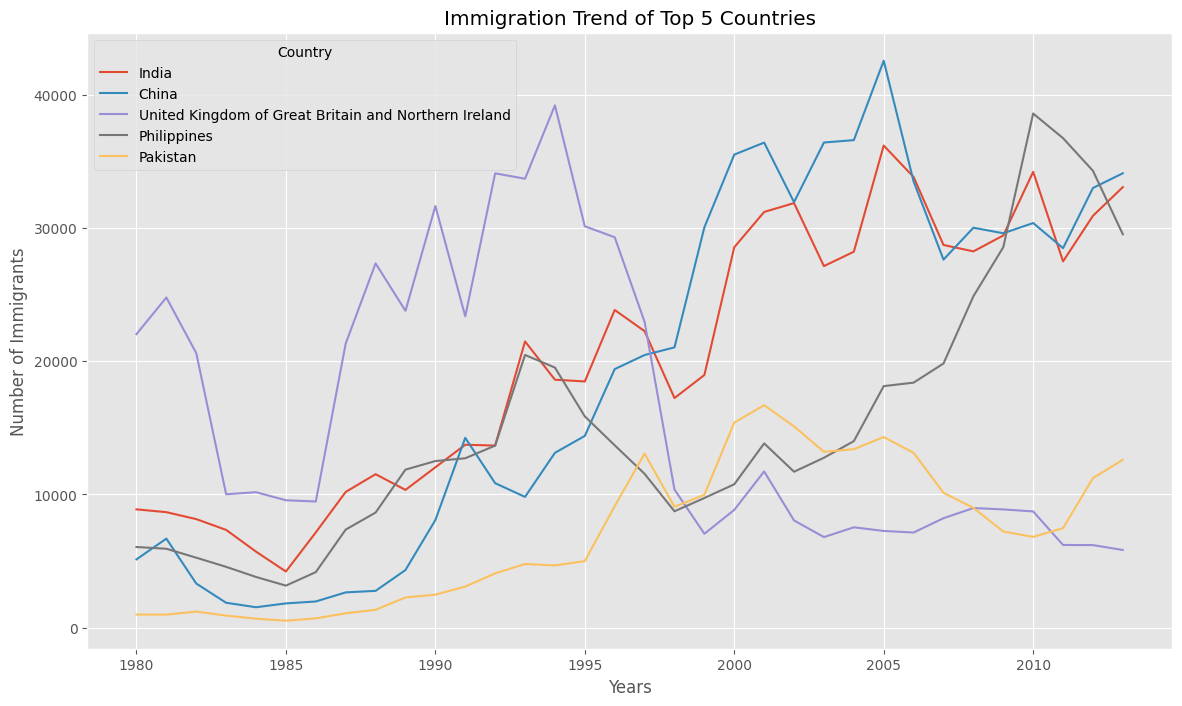

In [39]:
#menambahkan negara 
#menampilkan negara-negara berdasarkan total 5 negara imigran terbanyak atau teratas
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [40]:
#memvisualisasikan plot sebagai cumulative plot (area plot)
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


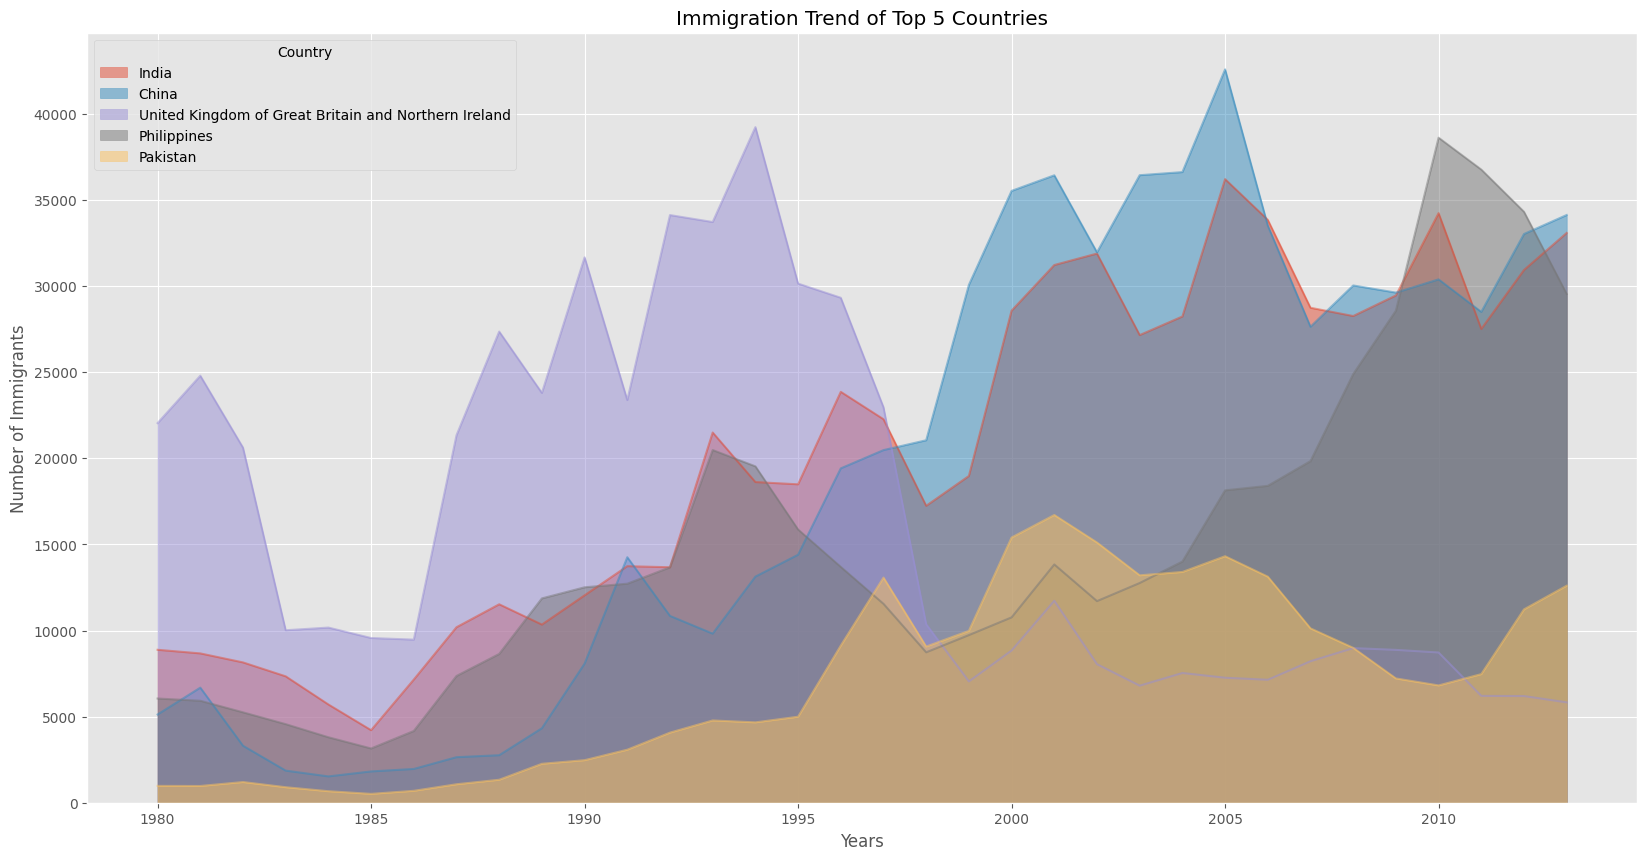

In [41]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20,10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

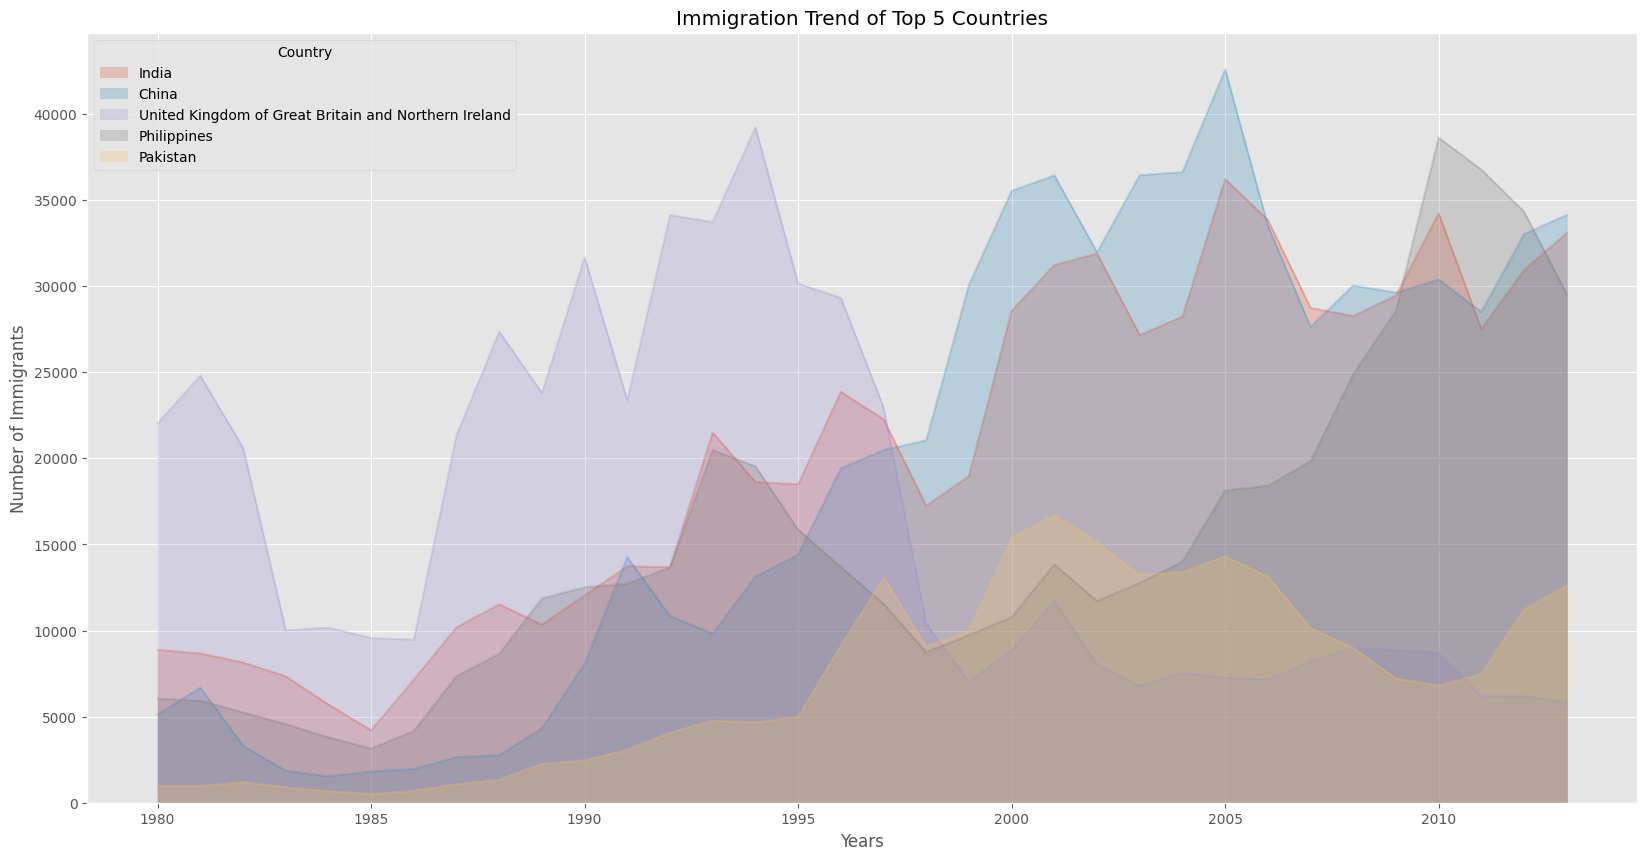

In [42]:
#mengubah transparansi default dengan memasukkan parameter alpha
df_top5.plot(kind='area',
             alpha=0.25,
             stacked=False,
             figsize=(20,10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Ada dua gaya untuk membuat plot dengan matplotlib, yaitu dengan artist layer dan scripting layer

Text(0.5, 0, 'Years')

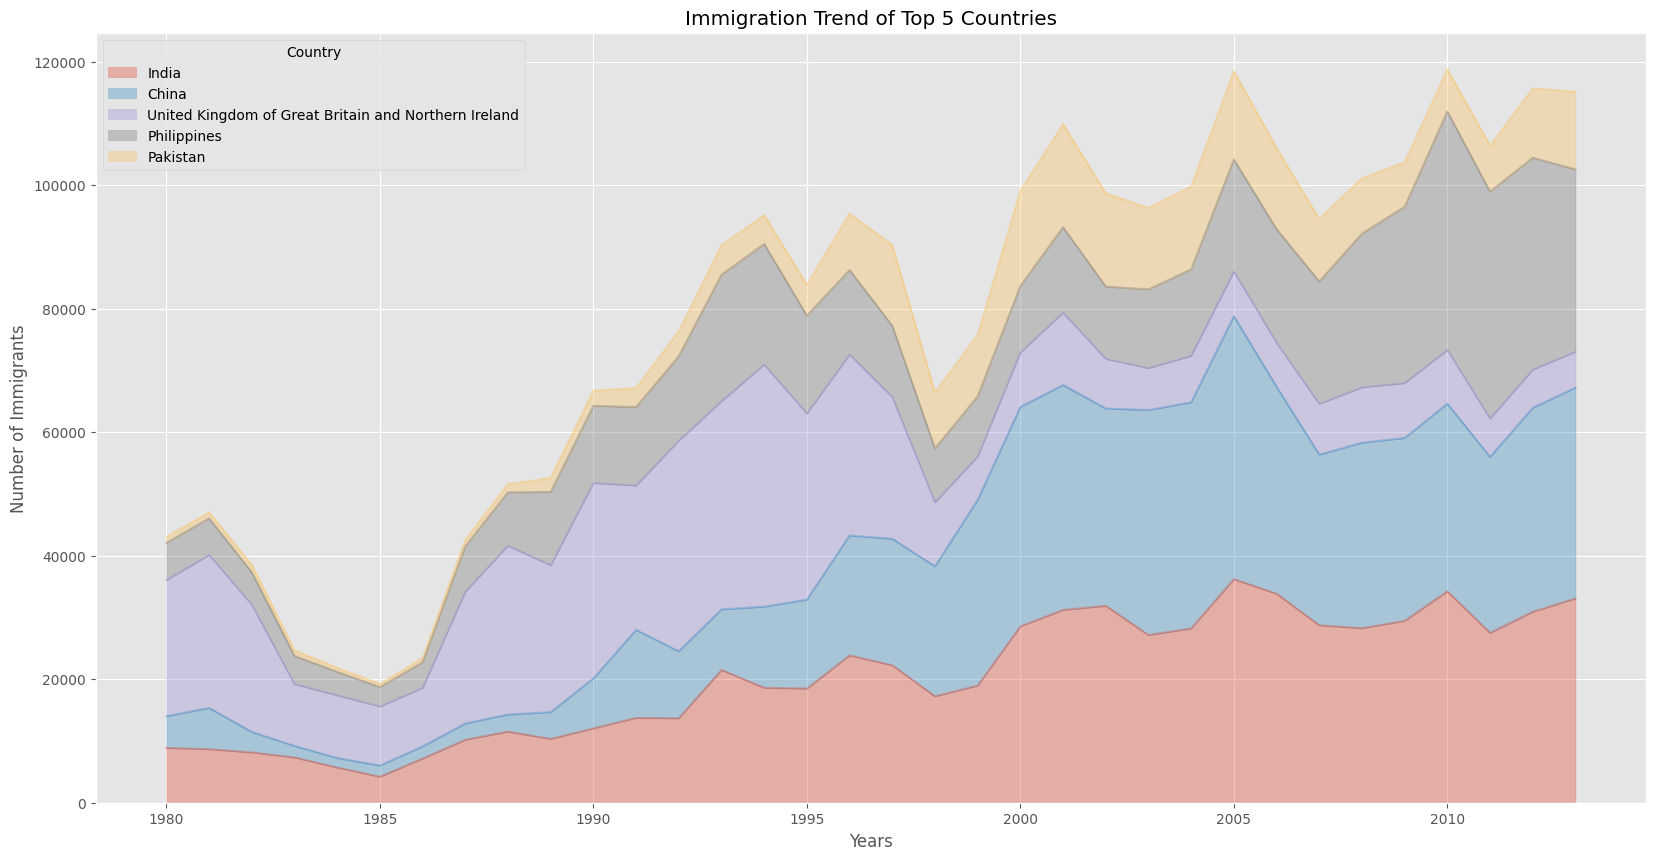

In [43]:
#1. scripting layer
df_top5.plot(kind='area',
             alpha=0.35,
             figsize=(20,10),
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

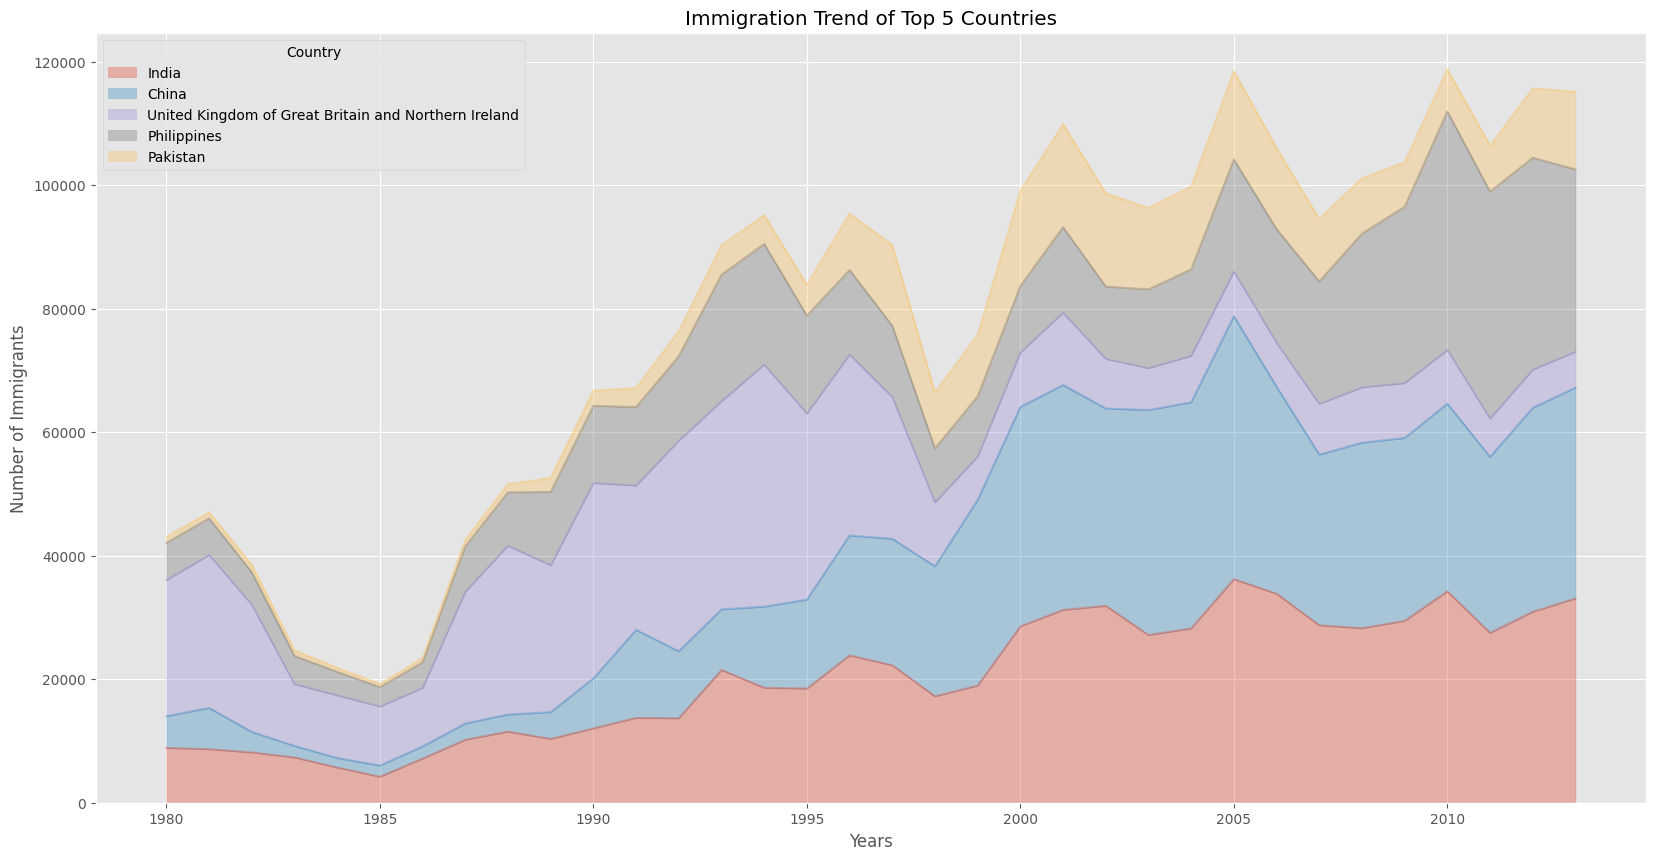

In [44]:
#2. artist layer
ax = df_top5.plot(kind='area',
                  alpha=0.35,
                  figsize=(20,10),
                  )

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


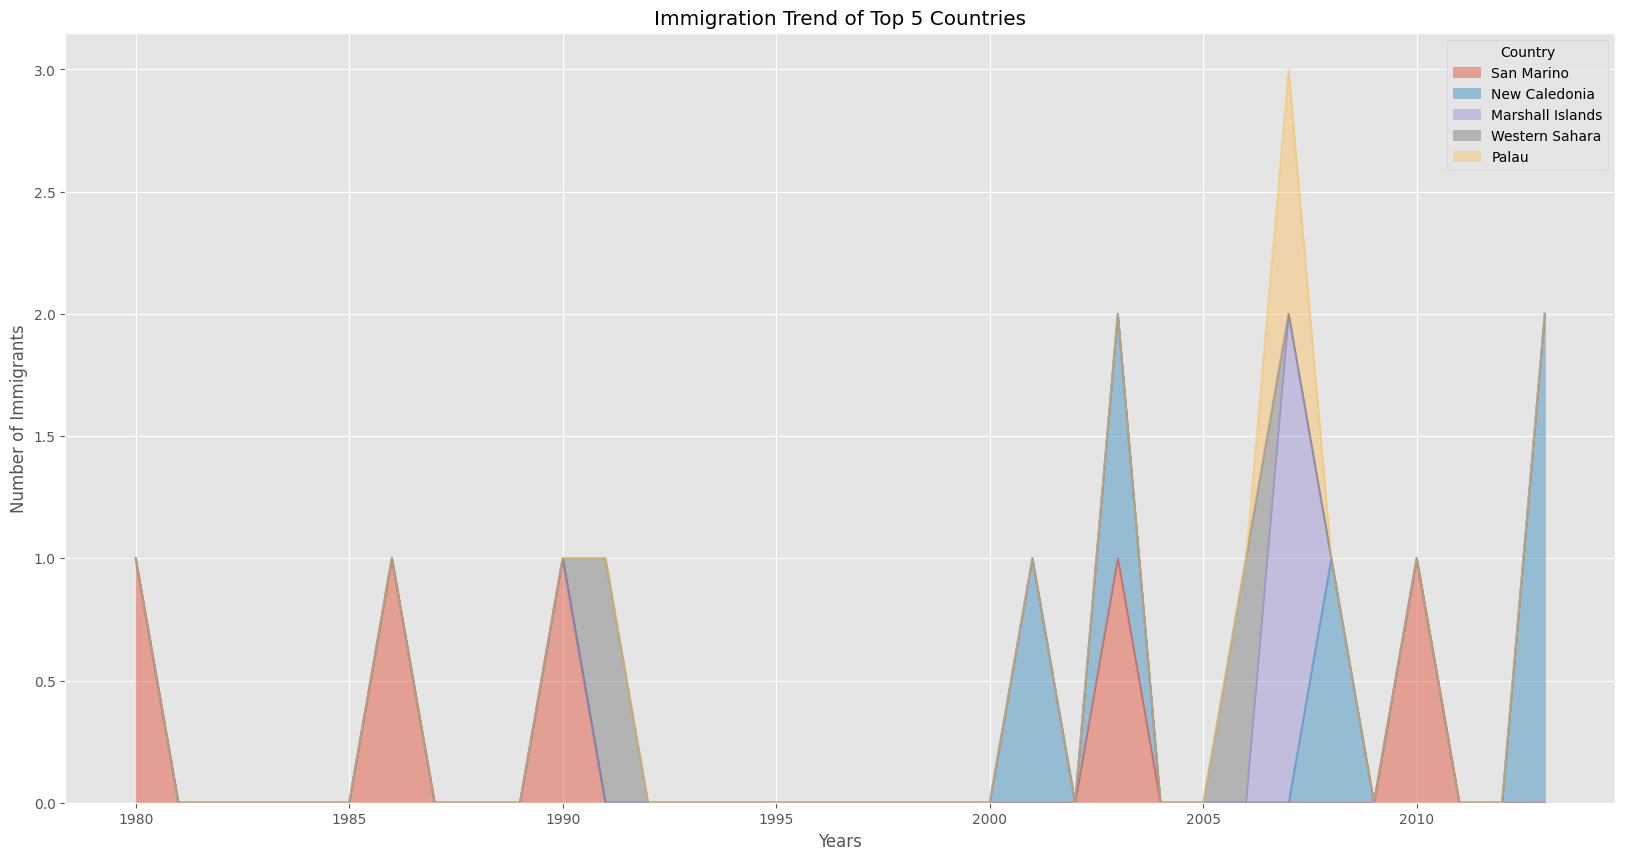

In [45]:
#menggunakan scripting layer untuk membuat stacked area plot 
#dari 5 negara imigrasi jumlah terbawah dengan nilai trans 0.45
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()

df_least5.plot(kind='area',
             alpha=0.45,
             stacked=True,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

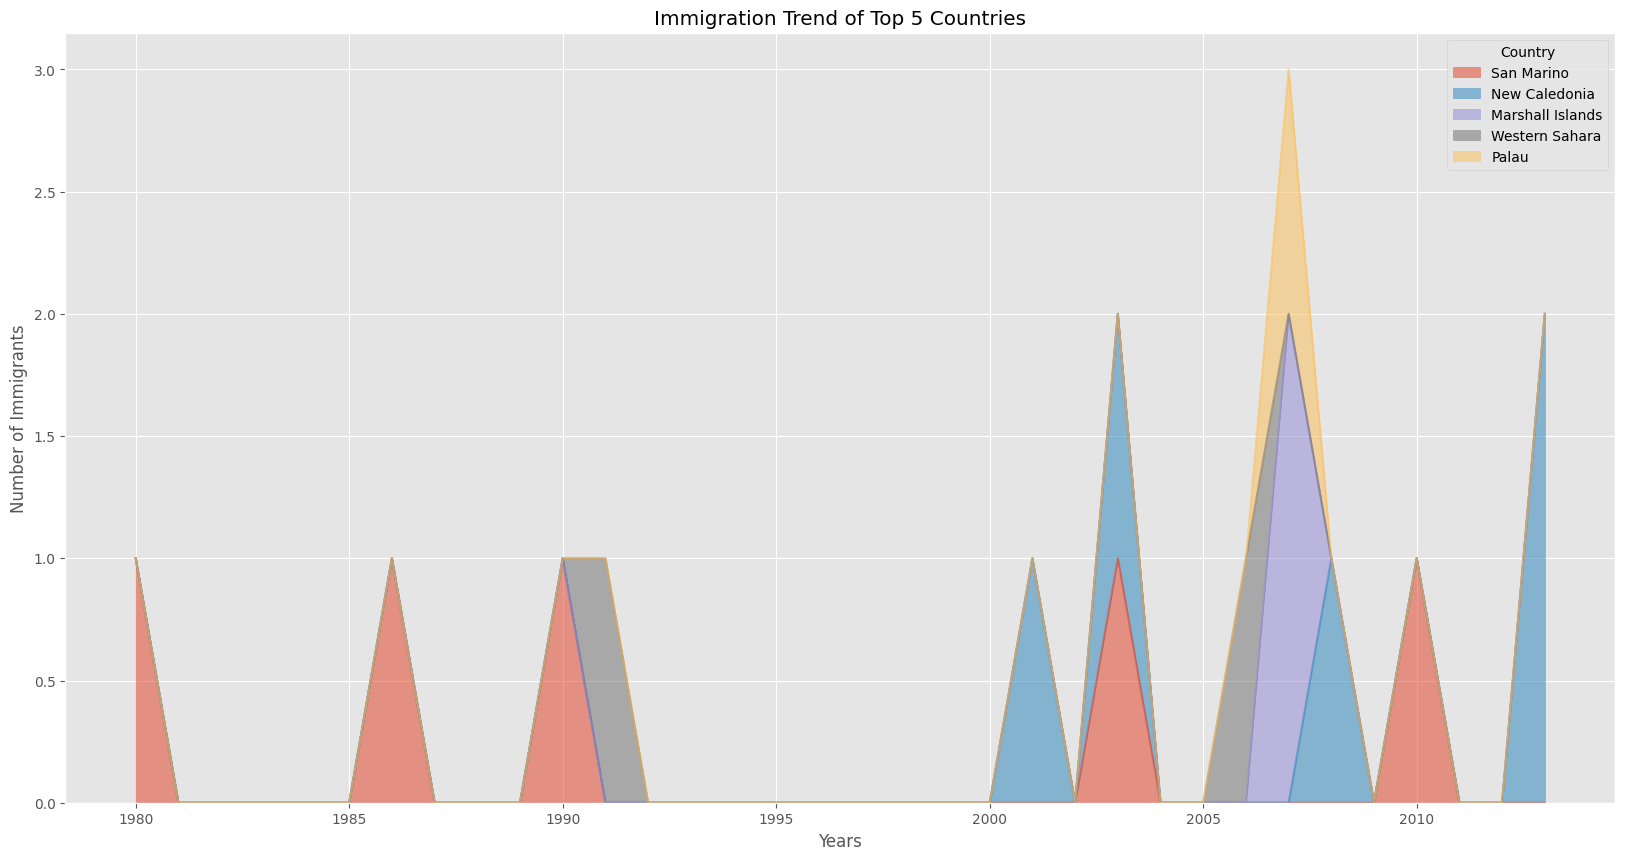

In [46]:
#menggunakan artist layer dengan nilai transparan 0.55
ax = df_least5.plot(kind='area',
                  alpha=0.55,
                  figsize=(20,10),
                  )

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Histogram

In [47]:
#sebelum kita membuat plot histogram, kita perlu memeriksa terlebih dahulu
#data yang akan dibagi menjadi beberapa interval
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [48]:
count, bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges)
#dapat dilihat bahwa metode histogram memecah dataet menjadi 10 bin

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


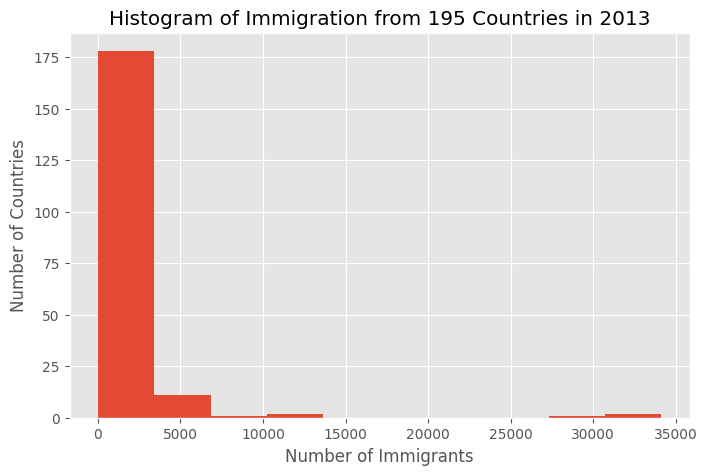

In [49]:
#membuat grafik distribusi dengan mudah yaitu dengan meneruskan kind=hist ke plot()
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

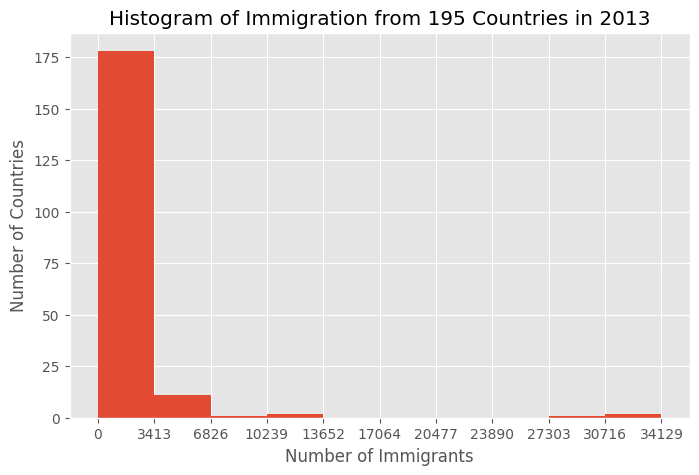

In [50]:
#mengubah tampilan interval dengan xticks
count, bin_edges = np.histogram(df_can['2013']) #bin_edges a/ list dari bin interval

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

In [51]:
#contoh menjawab pertanyaan dengan histogram
#berapa imigrasi di denmark, norway dan sweden pada tahun 1980 - 2013?

#melihat dataset
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot: ylabel='Frequency'>

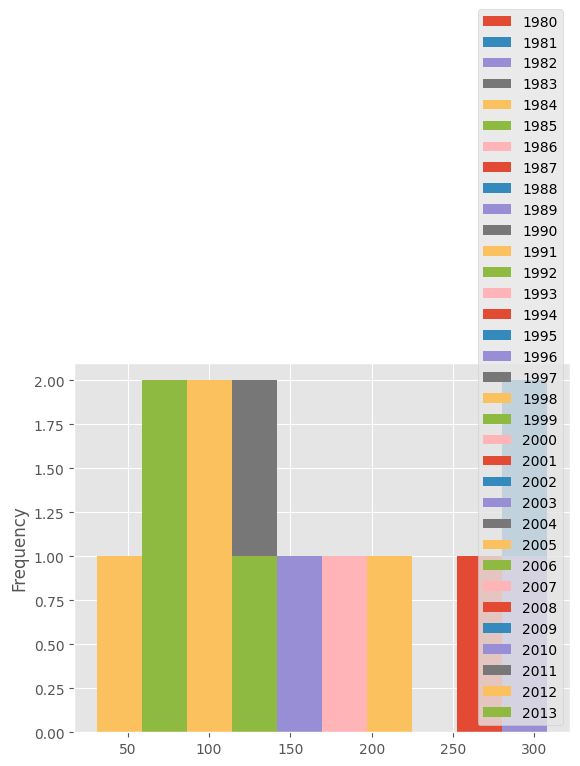

In [52]:
#membuat histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [53]:
#dapat dilihat bahwa data terlihat berantakan
#kita dapat memperbaikinya dengan terlebih dahulu mengubah urutan dataset nya
#dan kemudian baru memplot nya
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
#transpose a/ untuk menukar baris dan kolom
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


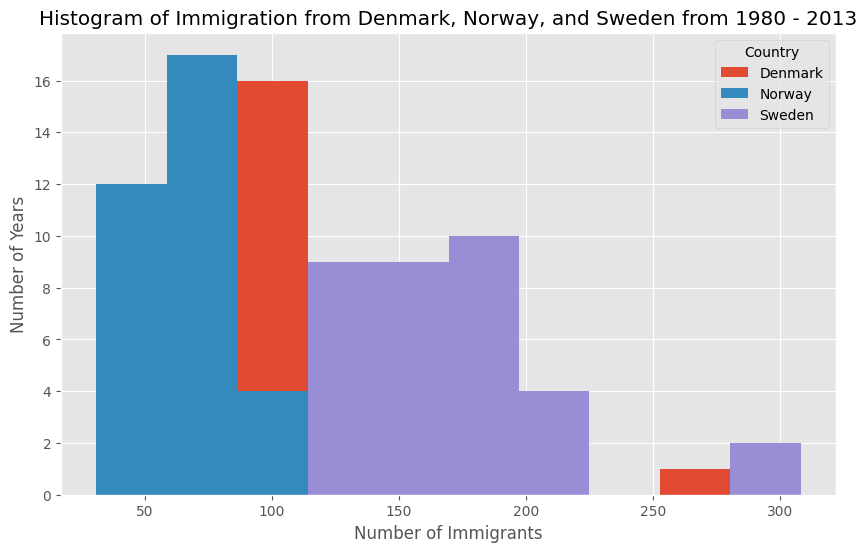

In [54]:
#membuat histogram baru
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

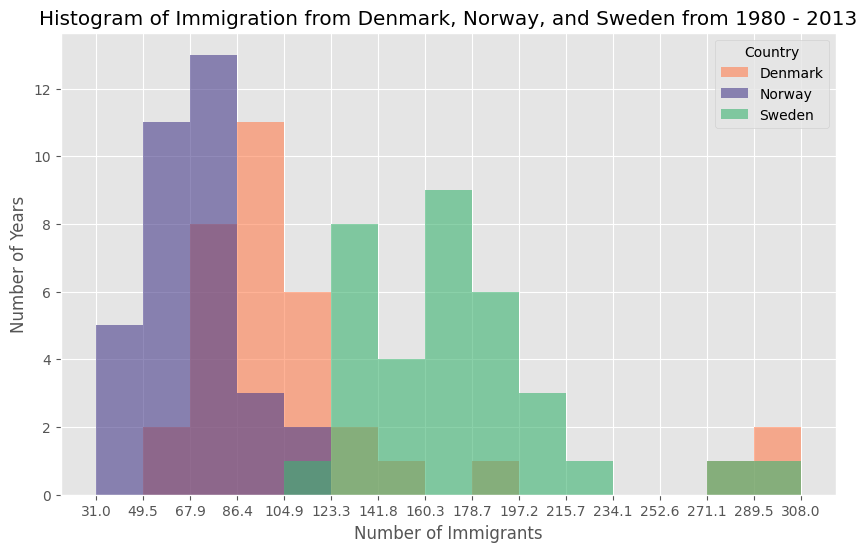

In [55]:
#memodifikasi histogram
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind ='hist',
          figsize=(10,6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

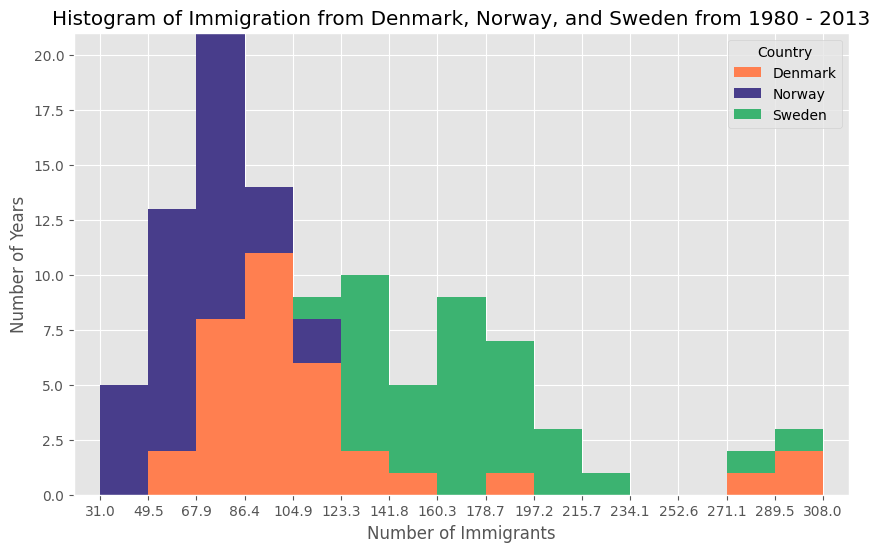

In [56]:
#ketika kita tidak ingin plot saling tumpang tindih, maka kita dapat menumpuknya
#menggunakan parameter stacked
#selain itu kita juga dapat pass tuple(min, max) dengan parameter xlim
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

df_t.plot(kind ='hist',
          figsize=(10,6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Bar Charts atau plot batang

In [57]:
#untuk membuat plot batang, kita dapat passing salah satu dari dua agrumen
#dengan parameter kind di plot() : kind=bar (untuk membuat verti bar plot)
#dan kind=barh (untuk membuat hori bar plot)
#contoh membuat vertikal bar plot -> membandingkan imigran dari canada pada tahun 1980 sampai 2013
#1. mendapatkan data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

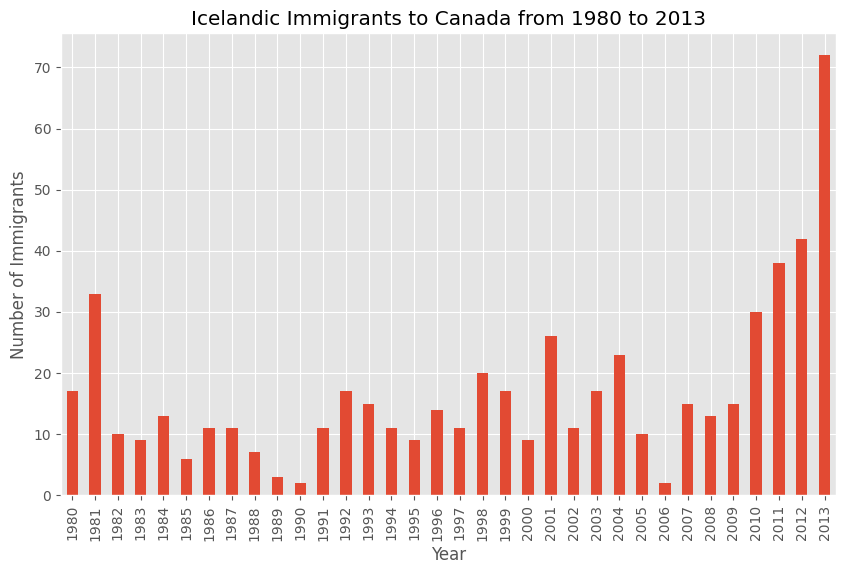

In [58]:
#2. membuat plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.show()

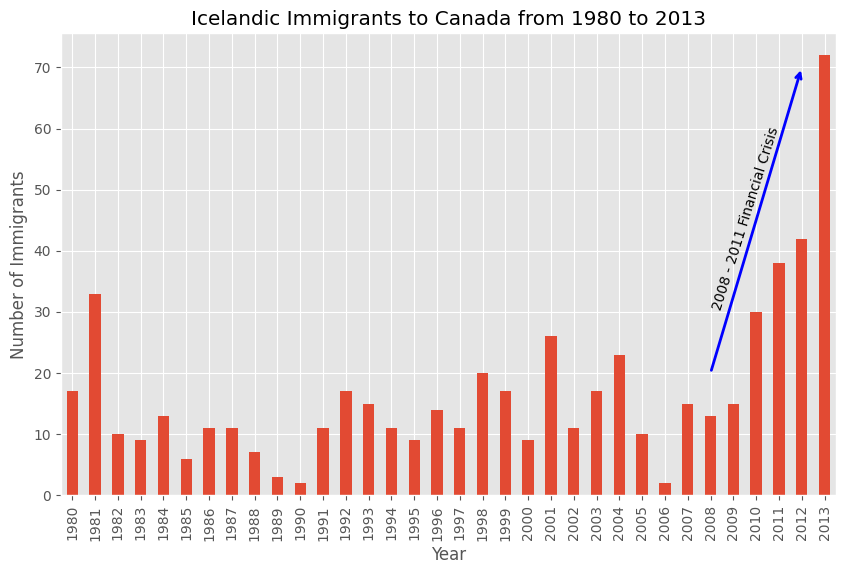

In [59]:
#memberikan anotasi pada scripting layer
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.annotate('',
             xy=(32, 70),
             xytext=(28, 20),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', 
             connectionstyle='arc3',
             color ='blue',
             lw=2)
            )

plt.annotate('2008 - 2011 Financial Crisis',
             xy=(28, 30),
             rotation=72.5,
             va='bottom',
             ha='left',
            )

plt.show()

In [60]:
#contoh membuat bar plot 
#membuat bar plot berdasarkan total 15 negara teratas yang menyumbang imigran
#1. mendapatkan data 15 negara teratas
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

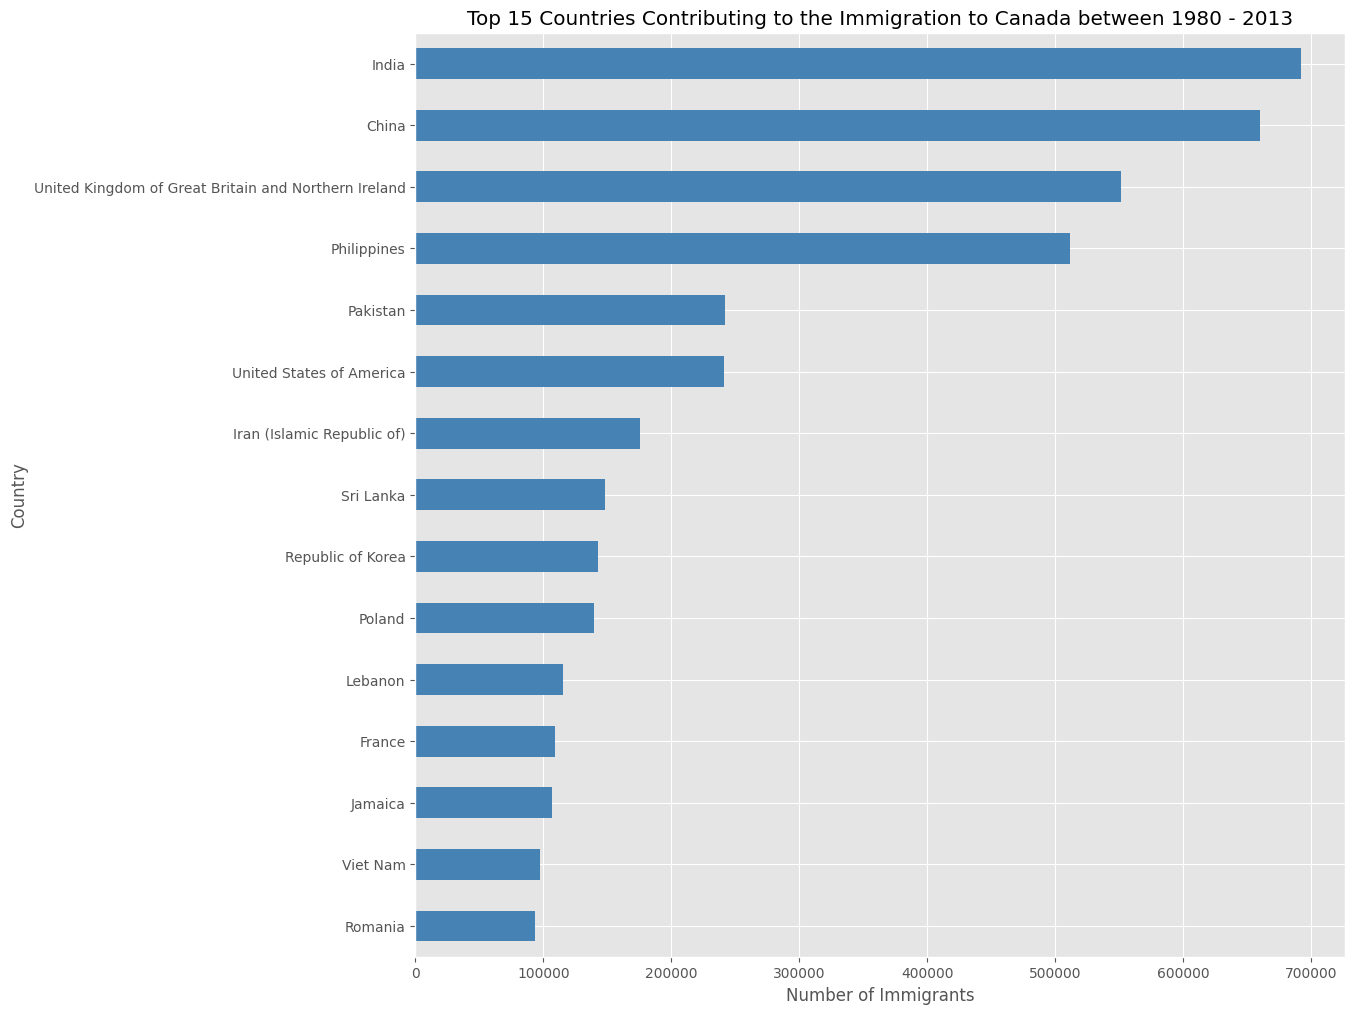

In [61]:
#2. membuat plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')

plt.show()

Pie Chart (diagram lingkaran)

In [63]:
#untuk membuat pie chart 
#1. mengumpulkan data, yaitu dengan metode pandas groupby 
df_continents  = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\USER\AppData\Local\Temp\ipykernel_10068\1951943442.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents  = df_can.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


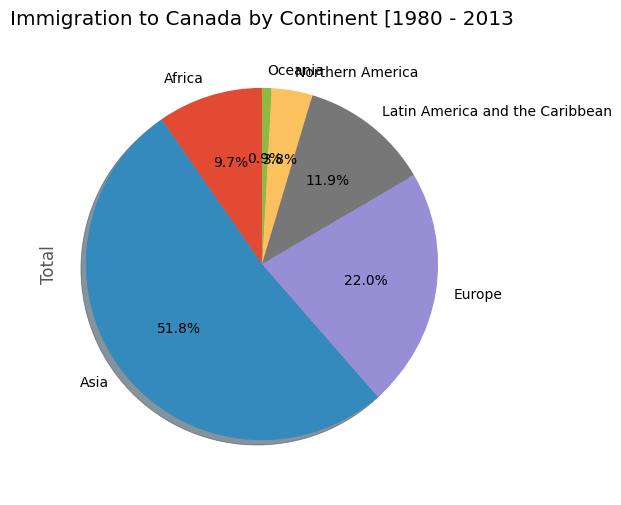

In [64]:
#2. membuat plot datanya
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013')
plt.axis('equal')

plt.show()

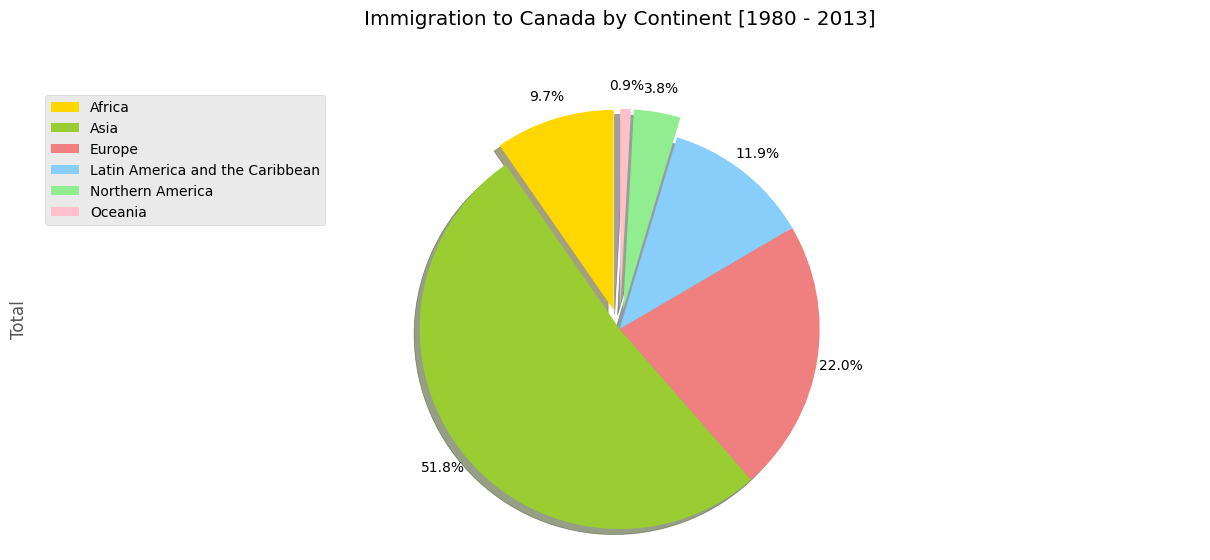

In [65]:
#dapat dilihat bahwa pie chart diatas masih banyak yang berantakan
#maka disini kita dapat memodifikasinya
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',
'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

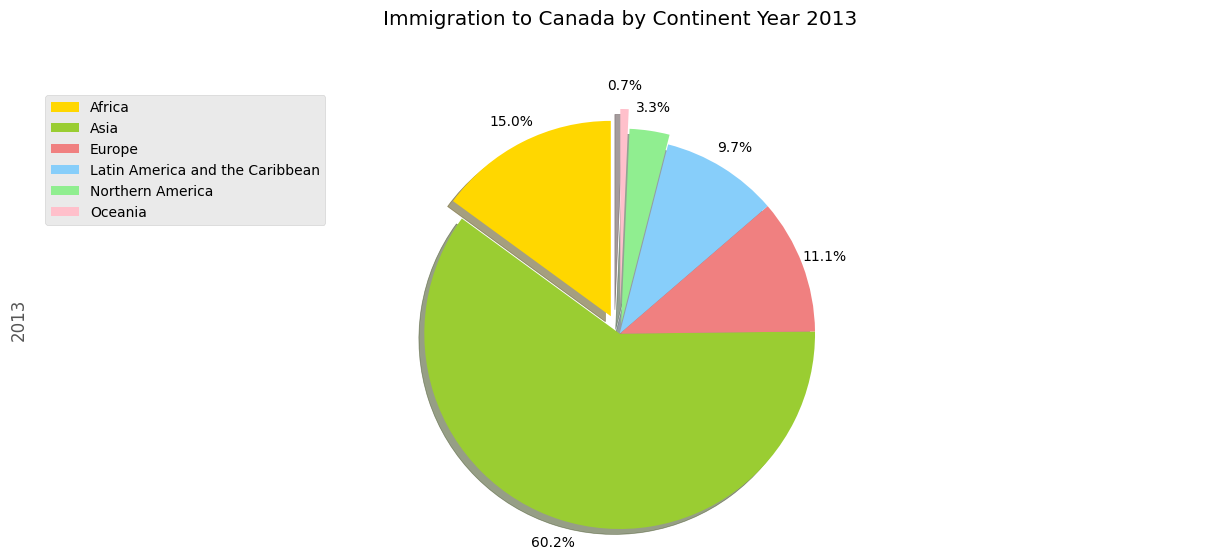

In [66]:
#membuat pie chart -> immigrasi ke canada berdasarkan benua pada tahun 2013
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',
'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.05, 0.15]

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent Year 2013', y=1.12)

plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()

Box Plots

In [67]:
#untuk membuat box plot bisa menggunakan metode kind=box
#membuat box plot untuk para immigran jepang dari tahun 1980 - 2013
#1. mendapatkan dataset
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()


Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


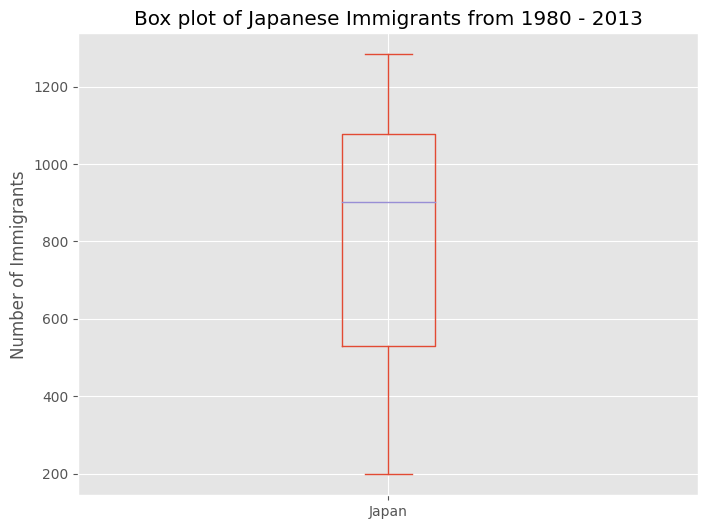

In [69]:
#membuat plotnya
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [70]:
#kita dapat melihat angka aktualnya pada dataframe
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [71]:
#membambandingkan immigrasi dari india dan china pada tahun 1980 - 2013
#mendapatkan dataset
df_CI = df_can.loc[(['China', 'India']), years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [72]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


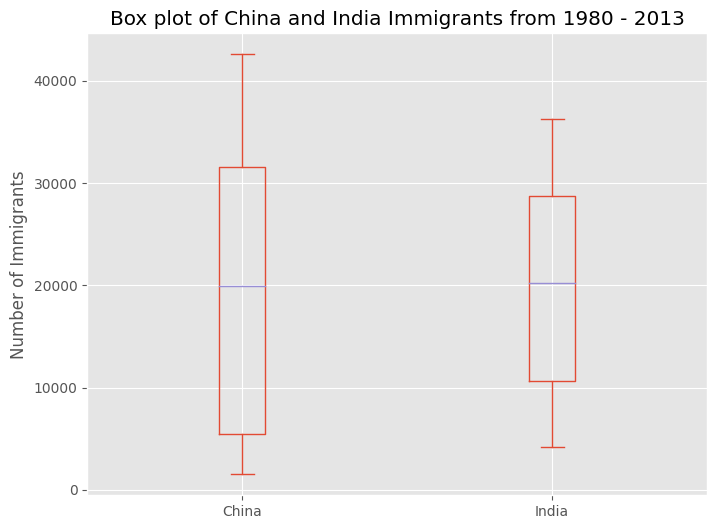

In [73]:
#membuat plot data
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

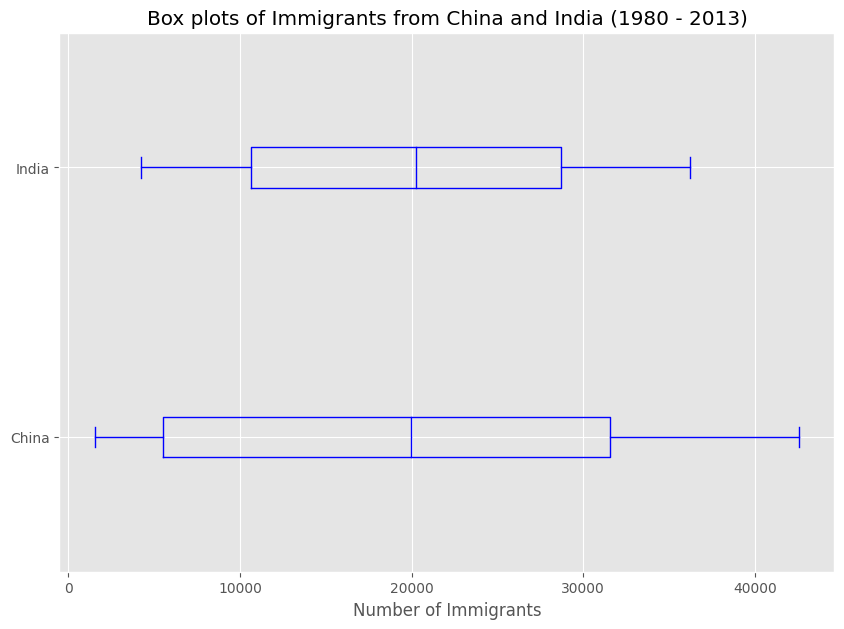

In [74]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

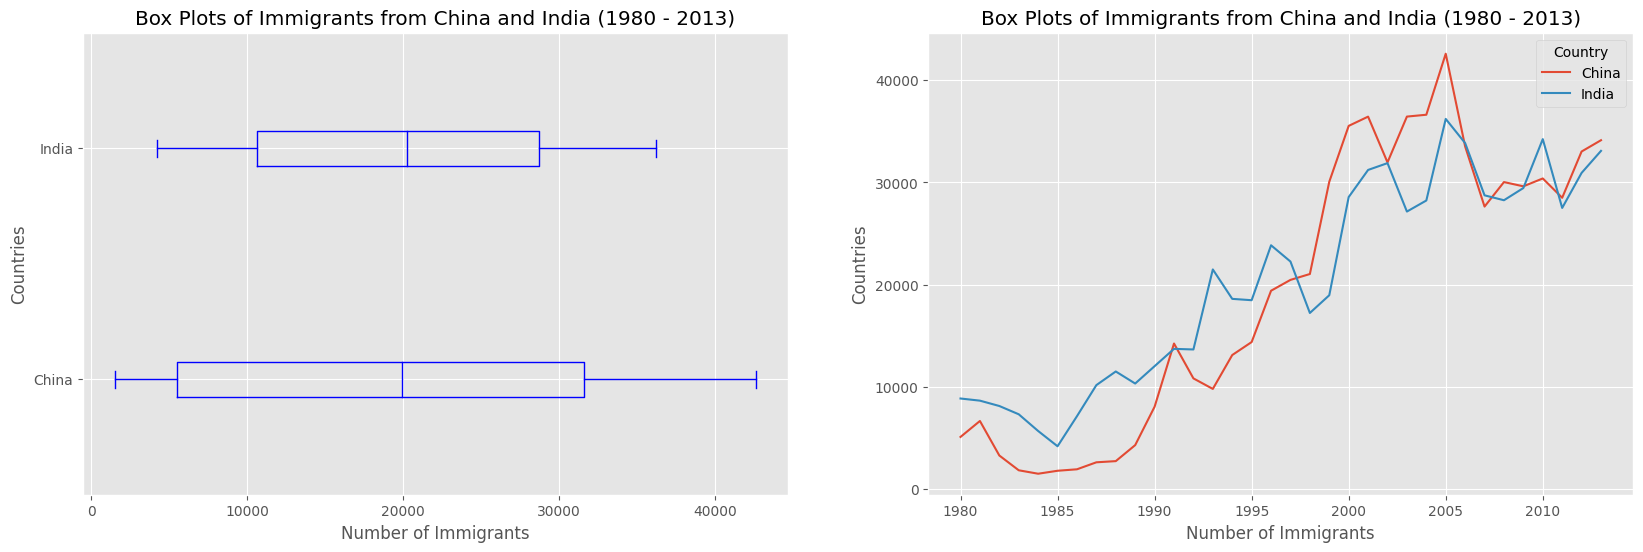

In [75]:
#ketika kita ingin membuat beberapa plot dalam figure yang sama
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

#subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_xlabel('Number of Immigrants')
ax1.set_ylabel('Countries')

plt.show()

Scatter Plots

In [77]:
#men-visualisasikan imigran total ke canada dari semua negara gabungan untuk tahun 1980 - 2013
#1. mendapatkan dataset
df_tot = pd.DataFrame(df_can[years].sum(axis=0)) #sum() u/ mendapatkan total populasi per tahun
df_tot.index = map(int, df_tot.index) #mengganti tipe years ke int
df_tot.reset_index(inplace = True) 
df_tot.columns = ['year', 'total'] #mengganti nama kolom
df_tot.head() 


,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


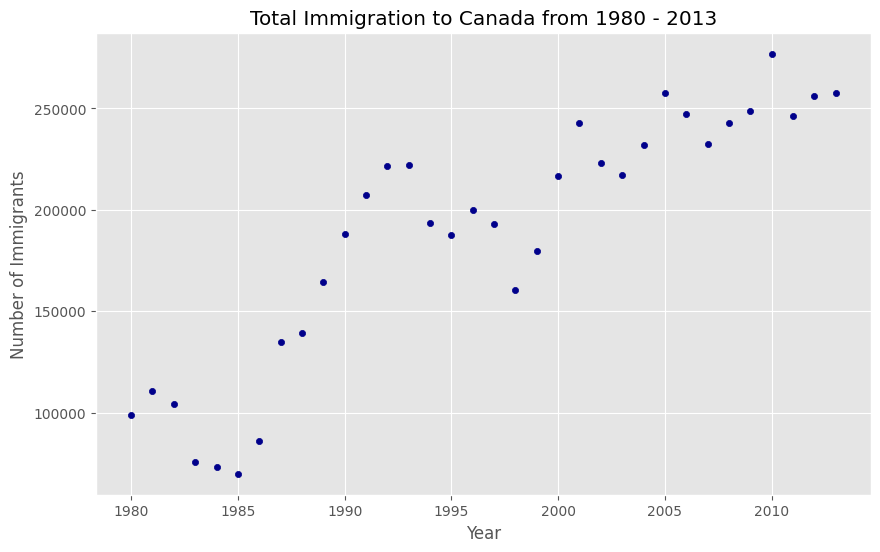

In [78]:
#membuat plot
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6),
color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [79]:
#membuat scatter plot dari total immigrasi dari denmark, norway, dan sweden dari tahun 1980 sampai 2013
#1. mendapatkan database
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1)) 
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head() 

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


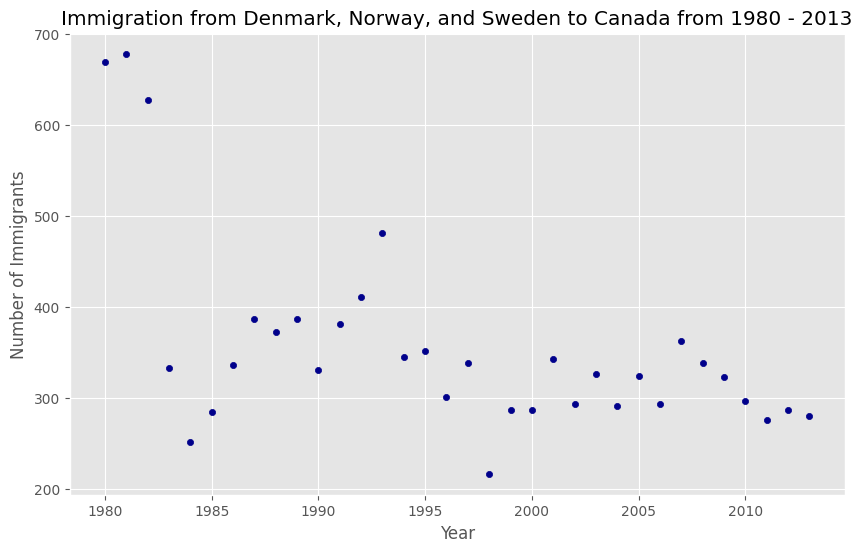

In [80]:
#2. membuat plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6),
color='darkblue')
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

Bubble Plots (variasi dari scatter plot yang menampilkan tiga dimensi)

In [82]:
#membandingkan imigrasi argentina dan brazil dari tahun 1980 - 2013
#1. mendapatkan dataset argentina dan brazil
df_can_t = df_can[years].transpose() #transpose dataframe
df_can_t.index = map(int, df_can_t.index) #mengganti tipe years ke int
df_can_t.index.name ='Year'
df_can_t.reset_index(inplace=True) 
df_can_t.head() 

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [84]:
#membuat normalisasi data
#normalize brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

#normalize argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

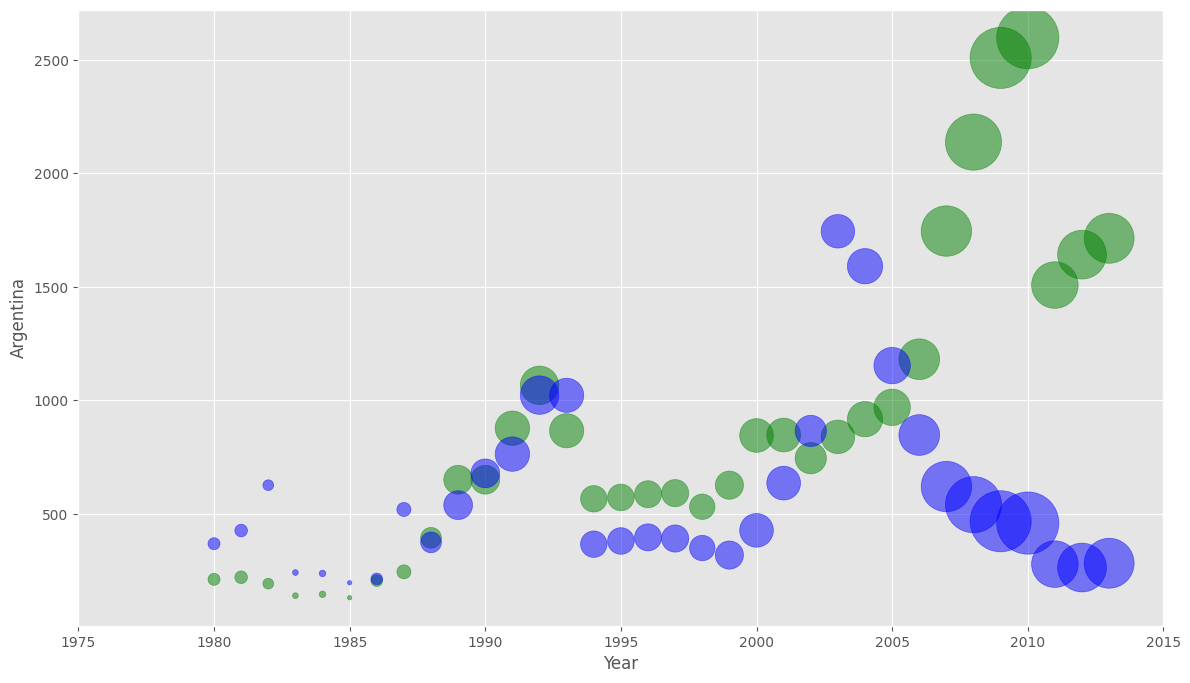

In [85]:
#plot data
#brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,
                    color='green',
                    s=norm_brazil * 2000 + 10,
                    xlim=(1975, 2015)
                    )

#argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color='blue',
                    s=norm_brazil * 2000 + 10,
                    ax = ax0
                    )